# Confidence interval, sampling, hypothesis testing
### Prof. Nino Narido

In this Notebook, we will examine a multitude of concepts,

- confidence interval
- sampling methods
- Bootstrapping
- hypothesis testing using James Bond example

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import mean

## Confidence interval
<br>

<img src="https://raw.githubusercontent.com/ninonarido/STATSPRO/main/images/Conf_interval.png" width=600 height=420></img>


<br>
Confidence intervals are a calculated range or boundary around a parameter or a statistic that is supported mathematically with a certain level of confidence. 

This is *__different__* than having a 95% probability that the true population proportion is within our confidence interval. Essentially, if we were to repeat this process, 95% of our calculated confidence intervals would contain the true proportion.

The equation to create a confidence interval can also be shown as:

$$Population\ Proportion\ or\ Mean\ \pm (t-multiplier *\ Standard\ Error)$$

The _Standard Error_ is calculated differenly for population proportion and mean:

$$Standard\ Error \ for\ Population\ Proportion = \sqrt{\frac{Population\ Proportion * (1 - Population\ Proportion)}{Number\ Of\ Observations}}$$

$$Standard\ Error \ for\ Mean = \frac{Standard\ Deviation}{\sqrt{Number\ Of\ Observations}}$$

Or C.I. (**C**onfidence **I**nterval),

$$ C.I. = \mu \pm t*\frac{\sigma}{\sqrt{n}} $$

where,

$\mu = \text{sample mean}$, $\sigma = \text{sample standard dev}$, $n = \text{number of samples}$

In [2]:
num_weeks = 52
production = np.random.normal(loc=20,scale=5,size=num_weeks)

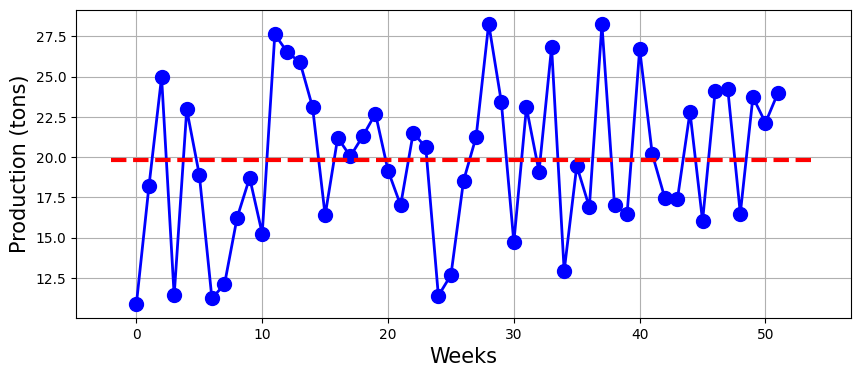

In [3]:
plt.figure(figsize=(10,4))
plt.plot(production,c='blue',lw=2,marker='o',markersize=10)
plt.grid(True)
plt.xlabel("Weeks",fontsize=15)
plt.ylabel("Production (tons)",fontsize=15)
plt.hlines(y=production.mean(),xmin=-2,xmax=54,color='red',linestyle='--',lw=3)
plt.show()

In [4]:
n = len(production)
m = production.mean()

In [5]:
production.std()

4.725072146880988

In [6]:
std_err=production.std()/np.sqrt(n)
print(std_err)

0.6552496117633122


In [7]:
confidence = 0.9
h = std_err * stats.t.ppf((1 + confidence) / 2, n)
i90 =[m-h,m+h]
print("90% confidence interval of mean from ",m-h," to ",m+h)

90% confidence interval of mean from  18.702573454549814  to  20.89725228947315


In [8]:
confidence = 0.99
h = std_err * stats.t.ppf((1 + confidence) / 2, n)
i99 =[m-h,m+h]
print("99% confidence interval of mean from ",m-h," to ",m+h)

99% confidence interval of mean from  18.047949948571382  to  21.551875795451583


In [9]:
i90[0],i90[1]

(18.702573454549814, 20.89725228947315)

In [10]:
i99[0],i99[1]

(18.047949948571382, 21.551875795451583)

### Repeat the random process many times

In [11]:
def repeat(n):
    means = []
    interval_90 = []
    interval_99 = []
    
    for i in range(n):
        num_weeks = 52
        production = np.random.normal(loc=20,scale=5,size=num_weeks)
        means.append(production.mean())
        if i90[0] <= production.mean() <= i90[1]:
            interval_90.append(production.mean())
        if i99[0] <= production.mean() <= i99[1]:
            interval_99.append(production.mean())
    return (interval_90,interval_99,np.array(means))

In [12]:
repeatations = 500
int_90,int_99,_ = repeat(repeatations)

In [13]:
len(int_90)/repeatations

0.878

In [14]:
len(int_99)/repeatations

0.98

---

## Random choice, shuffling

In [15]:
np.random.choice(4, 12)

array([0, 3, 1, 1, 1, 3, 3, 3, 1, 0, 2, 3])

In [16]:
np.random.choice(4, 12, p=[.4, .1, .1, .4])

array([3, 3, 2, 2, 1, 3, 1, 0, 3, 2, 0, 0])

In [17]:
x = np.random.randint(0, 10, (8, 12))
x

array([[7, 1, 1, 6, 9, 7, 3, 7, 7, 6, 7, 7],
       [3, 7, 6, 5, 6, 3, 6, 4, 9, 1, 1, 3],
       [1, 0, 7, 6, 8, 3, 5, 3, 3, 4, 5, 0],
       [9, 7, 0, 3, 8, 8, 5, 8, 7, 7, 0, 6],
       [2, 1, 5, 2, 7, 9, 9, 9, 6, 2, 4, 4],
       [6, 7, 5, 2, 3, 0, 0, 7, 7, 0, 6, 0],
       [4, 5, 6, 5, 4, 8, 4, 3, 4, 7, 0, 2],
       [0, 8, 2, 7, 6, 8, 1, 3, 8, 5, 1, 1]])

In [18]:
# sampling individual elements
np.random.choice(x.ravel(), 12)

array([2, 9, 1, 7, 4, 7, 9, 3, 6, 7, 4, 7])

In [19]:
# sampling rows
idx = np.random.choice(x.shape[0], 4)
x[idx, :]

array([[7, 1, 1, 6, 9, 7, 3, 7, 7, 6, 7, 7],
       [4, 5, 6, 5, 4, 8, 4, 3, 4, 7, 0, 2],
       [0, 8, 2, 7, 6, 8, 1, 3, 8, 5, 1, 1],
       [6, 7, 5, 2, 3, 0, 0, 7, 7, 0, 6, 0]])

In [20]:
# sampling columns
idx = np.random.choice(x.shape[1], 4)
x[:, idx]

array([[7, 7, 7, 7],
       [1, 3, 3, 3],
       [5, 3, 3, 3],
       [0, 8, 8, 8],
       [4, 9, 9, 9],
       [6, 0, 0, 0],
       [0, 8, 8, 8],
       [1, 8, 8, 8]])

In [21]:
# Shuffling occurs "in place" for efficiency and only along the first axis for multi-dimensional arrays
np.random.shuffle(x)
x

array([[1, 0, 7, 6, 8, 3, 5, 3, 3, 4, 5, 0],
       [4, 5, 6, 5, 4, 8, 4, 3, 4, 7, 0, 2],
       [7, 1, 1, 6, 9, 7, 3, 7, 7, 6, 7, 7],
       [2, 1, 5, 2, 7, 9, 9, 9, 6, 2, 4, 4],
       [0, 8, 2, 7, 6, 8, 1, 3, 8, 5, 1, 1],
       [3, 7, 6, 5, 6, 3, 6, 4, 9, 1, 1, 3],
       [6, 7, 5, 2, 3, 0, 0, 7, 7, 0, 6, 0],
       [9, 7, 0, 3, 8, 8, 5, 8, 7, 7, 0, 6]])

In [22]:
# To shuffle columns instead, transpose before shuffling
np.random.shuffle(x.T)
x

array([[0, 3, 3, 5, 8, 6, 0, 4, 1, 7, 3, 5],
       [2, 8, 3, 4, 4, 5, 5, 7, 4, 6, 4, 0],
       [7, 7, 7, 3, 9, 6, 1, 6, 7, 1, 7, 7],
       [4, 9, 9, 9, 7, 2, 1, 2, 2, 5, 6, 4],
       [1, 8, 3, 1, 6, 7, 8, 5, 0, 2, 8, 1],
       [3, 3, 4, 6, 6, 5, 7, 1, 3, 6, 9, 1],
       [0, 0, 7, 0, 3, 2, 7, 0, 6, 5, 7, 6],
       [6, 8, 8, 5, 8, 3, 7, 7, 9, 0, 7, 0]])

### Bootstrapping example (3000 samples)

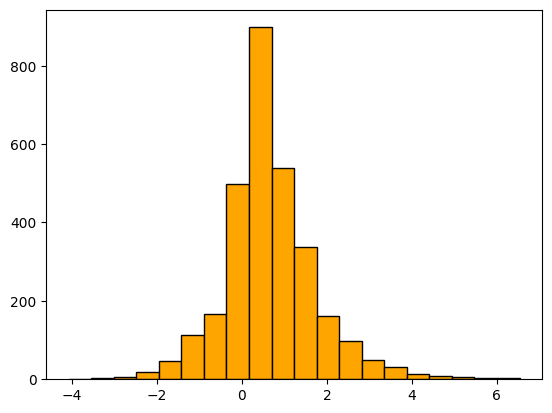

In [23]:
x = np.concatenate([np.random.exponential(size=2000), np.random.normal(size=1000)])
plt.hist(x, 20,edgecolor='k',color='orange')
plt.show()

In [24]:
n = len(x)
reps = 10000

# Bootstrapping n-samples from array x with replacements many times (reps=10000) 
xb = np.random.choice(x, (n, reps))
# Mean of the bootstrappen arrays
mb = xb.mean(axis=0)
# Sort the array of means
mb.sort()

In [25]:
# Compute percentile for 90% confidence interval
np.percentile(mb, [5, 95])

array([0.62966011, 0.69390426])

In [26]:
# Compute percentile for 99% confidence interval
np.percentile(mb, [0.5, 99.5])

array([0.61120024, 0.71176105])

### Same underlying process but only 300 samples

In [27]:
x = np.concatenate([np.random.exponential(size=200), np.random.normal(size=100)])

In [28]:
n = len(x)
reps = 10000

# Bootstrapping n-samples from array x with replacements many times (reps=10000) 
xb = np.random.choice(x, (n, reps))
# Mean of the bootstrappen arrays
mb = xb.mean(axis=0)
# Sort the array of means
mb.sort()

In [29]:
# Compute percentile for 90% confidence interval
np.percentile(mb, [5, 95])

array([0.54036478, 0.75913875])

In [30]:
# Compute percentile for 99% confidence interval
np.percentile(mb, [0.5, 99.5])

array([0.47884086, 0.82867795])

## Hypothesis testing

### The process

Statistical hypothesis testing reflects **the scientific method, adapted to the setting of research involving data analysis**. In this framework, a researcher makes a precise statement about the population of interest, then aims to falsify the statement. 

In statistical hypothesis testing, the statement in question is the **null hypothesis**. If we reject the null hypothesis, we have falsified it (to some degree of confidence). 

According to the scientific method, falsifying a hypothesis should require an overwhelming amount of evidence against it. If the data we observe are ambiguous, or are only weakly contradictory to the null hypothesis, we do not reject the null hypothesis.

Basis of hypothesis testing has two attributes:

**Null Hypothesis: $H_0$**

**Alternative Hypothesis: $H_a$**

Various cases which are generally used in hypothesis testing are:

* One Population Proportion
* Difference in Population Proportions
* One Population Mean
* Difference in Population Means

The equation to compute the ***test statistic*** is:

$$test\ statistic = \frac{Best\ Estimate - Hypothesized\ Estimate}{Standard\ Error\ of\ Estimate}$$

After computing this _test statistic_, we ask ourselves, "How likely is it to see this value of the test statistic under the Null hypothesis?" i.e. we compute a probability value.

Depending on that probability, we either **reject or fail to reject the null hypothesis**. Note, we **do not accept the alternate hypothesis** because we can never ovserve all the data in the universe.

### Type-I and Type-II errors

The framework of formal hypothesis testing defines two distinct types of errors. A **type I error (false positive)** occurs when the null hypothesis is true but is incorrectly rejected. A **type II error** occurs when the null hypothesis is not rejected when it actually is false. 

Most traditional methods for statistical inference aim to strictly control the probability of a type I error, usually at 5%. While we also wish to minimize the probability of a type II error, this is a secondary priority to controlling the type I error.

### Let us simulate James Bond's Martini guessing!

![bond_martini](https://raw.githubusercontent.com/ninonarido/STATSPRO/main/images/bond_martini.PNG)

Suppose we gave Mr. Bond a series of 16 taste tests. In each test, we flipped a fair coin to determine whether to stir or shake the martini.

Then we presented the martini to Mr. Bond and asked him to decide whether it was shaken or stirred. Let's say Mr. Bond was correct on 13 of the 16 taste tests.

**Does this prove that Mr. Bond has at least some ability to tell whether the martini was shaken or stirred?**

In [31]:
martini = ['shaken','stirred']

In [32]:
glasses = []
for _ in range(16):
    glasses.append(np.random.choice(martini))    

In [33]:
for g in glasses:
    print(g,end=', ')

shaken, stirred, shaken, stirred, stirred, stirred, stirred, stirred, stirred, stirred, shaken, shaken, shaken, stirred, shaken, stirred, 

### A function to generate Mr. Bond's response (when he is randomly guessing)

In [34]:
def bond_guess(n,verbose=True):
    score=[]
    for _ in range(n):
        bond_answers = []
        for _ in range(16):
            bond_answers.append(np.random.choice(martini))
        if verbose:
            print("My name is Bond...James Bond, and I say the glasses are as follows:",bond_answers)
        correct_guess = np.sum(np.array(bond_answers)==np.array(glasses))
        if verbose:
            print("\nMr. James Bond gave {} correct answers".format(correct_guess))
            print("-"*100)
        score.append(correct_guess)
    return np.array(score)

### Print 5 typical responses when Mr. Bond is randomly guessing 

In [35]:
_=bond_guess(5)

My name is Bond...James Bond, and I say the glasses are as follows: ['stirred', 'stirred', 'shaken', 'stirred', 'stirred', 'stirred', 'shaken', 'shaken', 'shaken', 'shaken', 'shaken', 'stirred', 'stirred', 'stirred', 'stirred', 'stirred']

Mr. James Bond gave 8 correct answers
----------------------------------------------------------------------------------------------------
My name is Bond...James Bond, and I say the glasses are as follows: ['shaken', 'shaken', 'shaken', 'stirred', 'stirred', 'shaken', 'stirred', 'shaken', 'stirred', 'stirred', 'stirred', 'stirred', 'stirred', 'stirred', 'stirred', 'stirred']

Mr. James Bond gave 9 correct answers
----------------------------------------------------------------------------------------------------
My name is Bond...James Bond, and I say the glasses are as follows: ['stirred', 'stirred', 'stirred', 'shaken', 'stirred', 'stirred', 'stirred', 'stirred', 'stirred', 'stirred', 'shaken', 'stirred', 'shaken', 'shaken', 'shaken', 'shaken']

M

### Compute the probability of score >=13

In [36]:
score = bond_guess(10000,verbose=False)
print(np.sum(score>=13)/10000)

0.0098


### Show probabilities of all the correct guesses (1-16) 

In [37]:
score = bond_guess(10000,verbose=False)
prob = []
guess = []
for i in range(17):
    print(f"Probability of answering {i} correct: {np.sum(score==i)/10000}")
    prob.append(np.sum(score==i)/10000)
    guess.append(i)

Probability of answering 0 correct: 0.0
Probability of answering 1 correct: 0.0003
Probability of answering 2 correct: 0.0012
Probability of answering 3 correct: 0.0089
Probability of answering 4 correct: 0.0252
Probability of answering 5 correct: 0.0733
Probability of answering 6 correct: 0.1229
Probability of answering 7 correct: 0.1723
Probability of answering 8 correct: 0.1958
Probability of answering 9 correct: 0.1751
Probability of answering 10 correct: 0.1231
Probability of answering 11 correct: 0.0634
Probability of answering 12 correct: 0.0268
Probability of answering 13 correct: 0.01
Probability of answering 14 correct: 0.0015
Probability of answering 15 correct: 0.0001
Probability of answering 16 correct: 0.0001


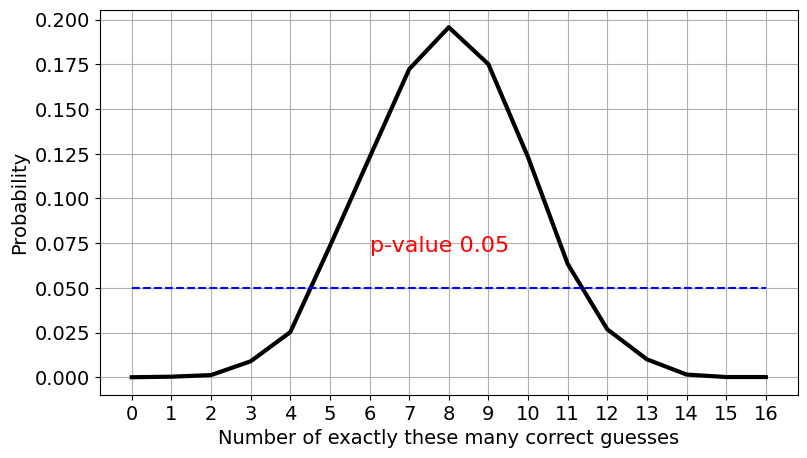

In [38]:
plt.figure(figsize=(9,5))
plt.plot(guess,prob,c='k',lw=3)
plt.xlabel("Number of exactly these many correct guesses",fontsize=14)
plt.ylabel("Probability",fontsize=14)
plt.xticks(guess,fontsize=14)
plt.yticks(fontsize=14)
plt.hlines(y=0.05,xmin=0,xmax=16,color='blue',linestyle='--')
plt.text(s="p-value 0.05",x=6,y=0.07,fontsize=16,color='red')
plt.grid(True)
plt.show()

### Show probabilities of _at least_ certain number of correct guesses

In [39]:
score = bond_guess(10000,verbose=False)
prob = []
guess = []
for i in range(1,17):
    print(f"Probability of answering at least {i} correct: {np.sum(score>=i)/10000}")
    prob.append(np.sum(score>=i)/10000)
    guess.append(i)

Probability of answering at least 1 correct: 1.0
Probability of answering at least 2 correct: 0.9997
Probability of answering at least 3 correct: 0.998
Probability of answering at least 4 correct: 0.9899
Probability of answering at least 5 correct: 0.9612
Probability of answering at least 6 correct: 0.8966
Probability of answering at least 7 correct: 0.7733
Probability of answering at least 8 correct: 0.6047
Probability of answering at least 9 correct: 0.4026
Probability of answering at least 10 correct: 0.2249
Probability of answering at least 11 correct: 0.1079
Probability of answering at least 12 correct: 0.039
Probability of answering at least 13 correct: 0.0117
Probability of answering at least 14 correct: 0.003
Probability of answering at least 15 correct: 0.0005
Probability of answering at least 16 correct: 0.0


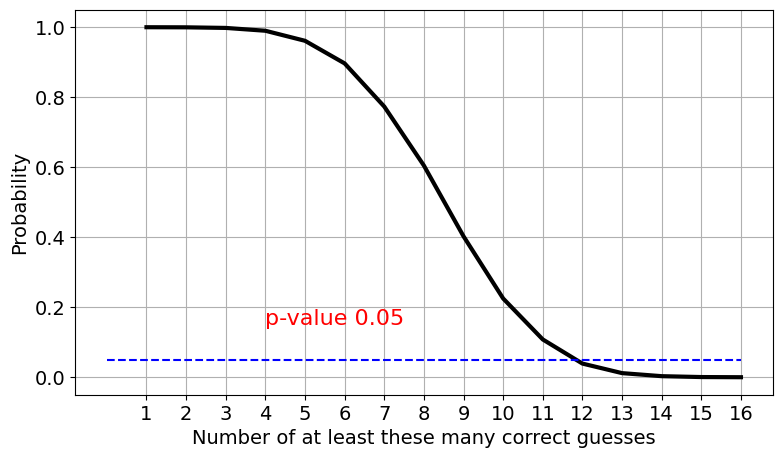

In [40]:
plt.figure(figsize=(9,5))
plt.plot(guess,prob,c='k',lw=3)
plt.xlabel("Number of at least these many correct guesses",fontsize=14)
plt.ylabel("Probability",fontsize=14)
plt.xticks(guess,fontsize=14)
plt.yticks(fontsize=14)
plt.hlines(y=0.05,xmin=0,xmax=16,color='blue',linestyle='--')
plt.text(s="p-value 0.05",x=4,y=0.15,fontsize=16,color='red')
plt.grid(True)
plt.show()

### What can we deduce from this probability distribution?

If we are going with p=0.05 or 95% significance level, then we can conclude that anything above 12 correct answers are unlikely if Mr. Bond was guessing randomly. 

## Hypothesis testing alternative example with population proportions
<br>
<img src="https://raw.githubusercontent.com/ninonarido/STATSPRO/main/images/Hypothesis_test.jpg" width=600 height=420></img>

### Research Question

*Is there a significant difference between the population proportions of parents of Black children and parents of Hispanic children who report that their child has had some swimming lessons*? (**A real-life study from the Univ. of Michigan**)

### Formulation

***Populations***: All parents of black children age 6-18 and all parents of Hispanic children age 6-18  
***Parameter of Interest***: p1 - p2, where p1 = black and p2 = hispanic  

***Null Hypothesis:*** p1 - p2 = 0  
***Alternative Hypthosis:*** p1 - p2 $\neq$ 0

### Data

247 Parents of Black Children
36.8% of parents report that their child has had some swimming lessons.

308 Parents of Hispanic Children
38.9% of parents report that their child has had some swimming lessons.

### Function used in the code

[Numpy Binomial distribution](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.binomial.html) because this is a matter of YES/NO answers (from the parents)

[Scipy independent t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) because we are interested in a two-sided test of equal/unequal means

In [41]:
import scipy.stats

In [42]:
n1 = 247
p1 = .37

n2 = 308
p2 = .39

population1 = np.random.binomial(1, p1, n1)
population2 = np.random.binomial(1, p2, n2)


In [43]:
print("Parents of Black children")
print("-"*55)
print(f"{population1.sum()} parents answered YES and {n1-population1.sum()} parents answered NO")
print("\nParents of Hispanic children")
print("-"*55)
print(f"{population2.sum()} parents answered YES and {n2-population2.sum()} parents answered NO")

Parents of Black children
-------------------------------------------------------
89 parents answered YES and 158 parents answered NO

Parents of Hispanic children
-------------------------------------------------------
133 parents answered YES and 175 parents answered NO


In [44]:
t_stat,pval=scipy.stats.ttest_ind(population1, population2)

In [45]:
print("The t-statistic from this data:",t_stat)
print("Corresponding p-value from this data:",pval)

The t-statistic from this data: -1.710032696926786
Corresponding p-value from this data: 0.08782075341574165


In [46]:
if pval>0.05:
  print("Based on this data, NULL hypothesis cannot be rejected \ni.e. there is no significant difference between the proportion of Black and Hispanic parents,\nwho reporpted that their children had a swimming lesson")
else:
  print("There seems to be a statisticlly significant difference in the proportion of Black and Hispanic parents,\nwho reporpted that their children had a swimming lesson")

Based on this data, NULL hypothesis cannot be rejected 
i.e. there is no significant difference between the proportion of Black and Hispanic parents,
who reporpted that their children had a swimming lesson
